In [91]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


import Ensemble

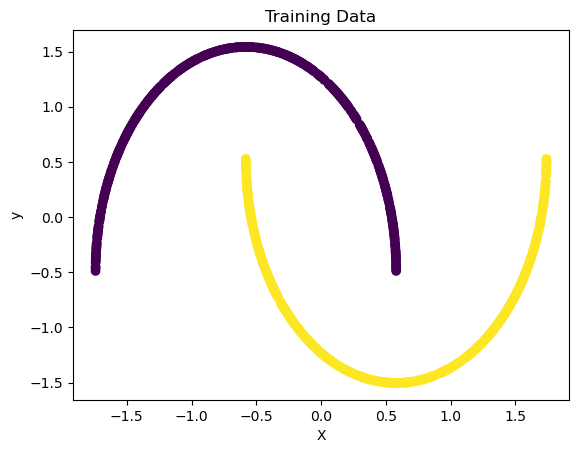

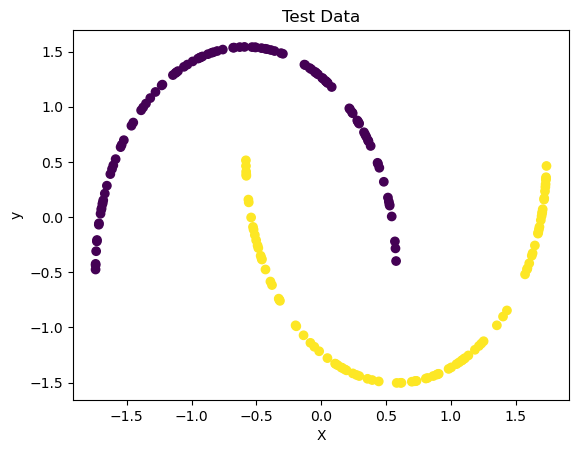

In [92]:
X, y = make_moons(n_samples=1000, noise=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Plot data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

0.8949999809265137


/Users/wu/Downloads/CS6956/A2/Ensemble.py:77: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1739474932605/work/aten/src/ATen/native/ReduceOps.cpp:1831.)
  variance_output = torch.var(models_outputs, dim=0)


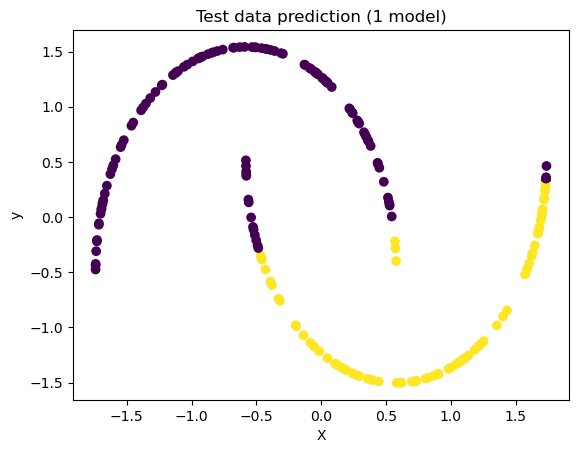

In [93]:
# Train deep ensembles
ensemble = Ensemble.DeepEnsemble(train_dataset, num_models=1)
ensemble.train_ensemble()

# Predict
mean_preds, _ = ensemble.predict(X_test_tensor)
y_predict = mean_preds.argmax(dim=1)

accuracy, uncertainty = ensemble.evaluate(X_test_tensor, y_test_tensor)
print(accuracy)

# Plot prediction
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test data prediction (1 model)")
plt.show()

In [94]:
num_models = [1, 5, 10, 20]
accuracy_list = []
uncertainty_list = []

for n in num_models:
    # Train deep ensembles
    ensemble = Ensemble.DeepEnsemble(train_dataset, num_models=n)
    ensemble.train_ensemble()

    # Predict
    accuracy, uncertainty = ensemble.evaluate(X_test_tensor, y_test_tensor)
    accuracy_list.append(accuracy)
    uncertainty_list.append(uncertainty.mean(dim=0))

print(accuracy_list)
print(uncertainty_list)

[0.8949999809265137, 0.9150000214576721, 0.9200000166893005, 0.9200000166893005]
[tensor([nan, nan]), tensor([1.3029, 1.2677]), tensor([1.2071, 1.0883]), tensor([1.1379, 0.8666])]


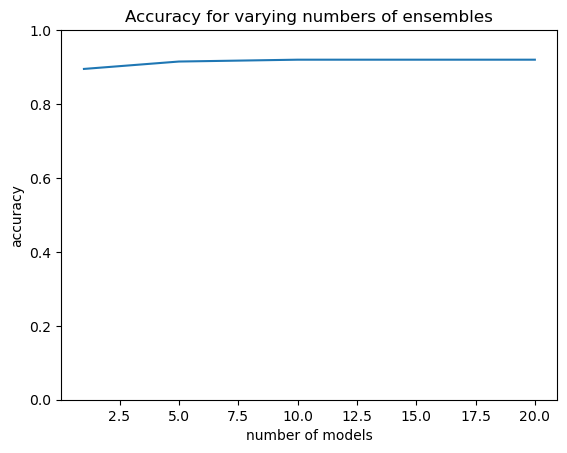

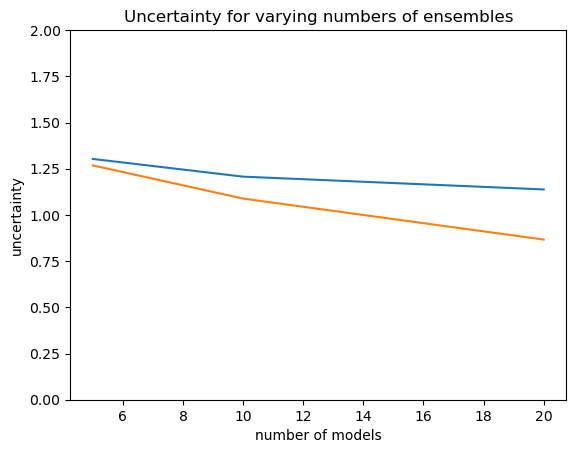

In [95]:
plt.plot(num_models, accuracy_list)
plt.ylim(0, 1)
plt.xlabel("number of models")
plt.ylabel("accuracy")
plt.title("Accuracy for varying numbers of ensembles")
plt.show()

plt.plot(num_models, uncertainty_list)
plt.ylim(0, 2)
plt.xlabel("number of models")
plt.ylabel("uncertainty")
plt.title("Uncertainty for varying numbers of ensembles")
plt.show()

In [96]:
# Higher dimensional realistic data set
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Load Fashion-MNIST
trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=transform, download=True
)
testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=transform, download=True
)

# Extract images and labels
X_train_raw = trainset.data.numpy()
y_train = trainset.targets.numpy()
X_test_raw = testset.data.numpy()
y_test = testset.targets.numpy()

# Flatten images
X_train = X_train_raw.reshape(len(X_train_raw), -1)
X_test = X_test_raw.reshape(len(X_test_raw), -1)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [105]:
num_models = [1, 5, 10]
accuracy_list = []
uncertainty_list = []
for n in num_models:
    # Train deep ensembles
    ensemble = Ensemble.DeepEnsemble(
        train_dataset,
        input_size=784,
        hidden_size=8,
        output_size=10,
        num_models=n,
        epochs=1,
        lr=0.04,
        weight_decay=0.01,
    )
    ensemble.train_ensemble()

    # Predict
    accuracy, uncertainty = ensemble.evaluate(X_test_tensor, y_test_tensor)
    accuracy_list.append(accuracy)
    print(accuracy)
    uncertainty_list.append(uncertainty.mean(dim=0))

/Users/wu/Downloads/CS6956/A2/Ensemble.py:77: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1739474932605/work/aten/src/ATen/native/ReduceOps.cpp:1831.)
  variance_output = torch.var(models_outputs, dim=0)


0.6754999756813049
0.7196000218391418
0.7508999705314636


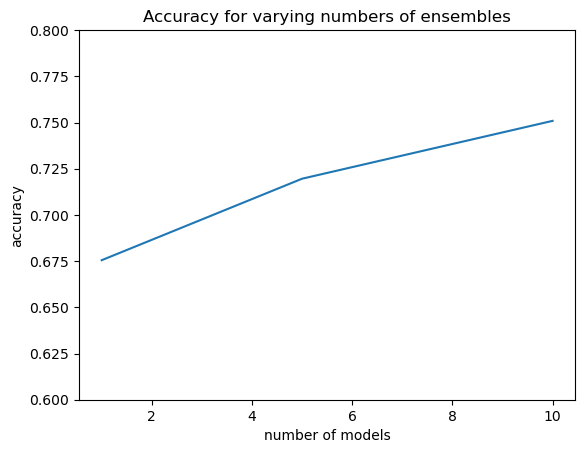

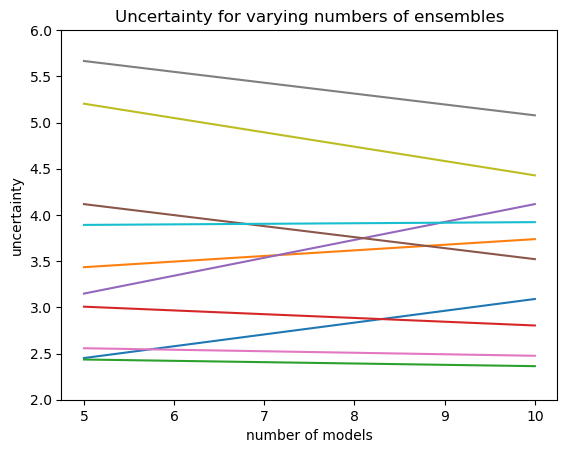

In [113]:
plt.plot(num_models, accuracy_list)
plt.ylim(0.6, 0.8)
plt.xlabel("number of models")
plt.ylabel("accuracy")
plt.title("Accuracy for varying numbers of ensembles")
plt.show()

plt.plot(num_models, uncertainty_list)
plt.ylim(2, 6)
plt.xlabel("number of models")
plt.ylabel("uncertainty")
plt.title("Uncertainty for varying numbers of ensembles")
plt.show()

In [107]:
num_models = [1, 5, 10]
accuracy_list_train = []
uncertainty_list_train = []
for n in num_models:
    # Train deep ensembles
    ensemble = Ensemble.DeepEnsemble(
        train_dataset,
        input_size=784,
        hidden_size=8,
        output_size=10,
        num_models=n,
        epochs=1,
        lr=0.04,
        weight_decay=0.01,
    )
    ensemble.train_ensemble()

    # Predict
    accuracy, uncertainty = ensemble.evaluate(X_train_tensor, y_train_tensor)
    accuracy_list_train.append(accuracy)
    print(accuracy)
    uncertainty_list_train.append(uncertainty.mean(dim=0))

0.6815166473388672
0.7215166687965393
0.7547666430473328


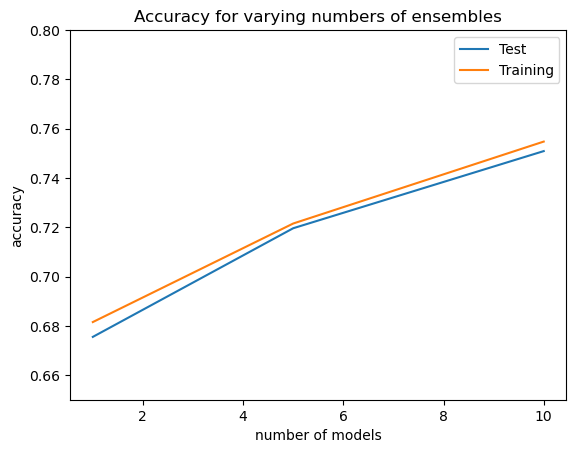

tensor(3.5912)


In [123]:
plt.plot(num_models, accuracy_list, label="Test")
plt.plot(num_models, accuracy_list_train, label="Training")
plt.ylim(0.65, 0.8)
plt.xlabel("number of models")
plt.ylabel("accuracy")
plt.title("Accuracy for varying numbers of ensembles")
plt.legend()
plt.show()

print((uncertainty_list[1].mean() + uncertainty_list[1].mean()) / 2)